In [1]:
!pip3 install  -e .

Obtaining file:///Users/user/%E3%83%9E%E3%82%A4%E3%83%89%E3%83%A9%E3%82%A4%E3%83%96/WorkingDirectoryG/git/myfunc
  Preparing metadata (setup.py) ... done
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: myfunc
    Found existing installation: myfunc 0.0.1
    Uninstalling myfunc-0.0.1:
      Successfully uninstalled myfunc-0.0.1
  Running setup.py develop for myfunc


In [34]:
%load_ext autoreload
%autoreload 2
import myfunc as mf
from myfunc.finance import finfunc as mff
mf.pref()
dir(mff)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['RS_func',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acf_plot',
 'acfs',
 'adf_summary',
 'cvar',
 'decompose',
 'dynamic_time_warping',
 'euclidean',
 'fast_Fourier_transform',
 'fast_Fourier_transform_',
 'fast_Fourier_transform_psd',
 'fastdtw',
 'filter_IIR_Butterworth',
 'filter_finite_impulse_response',
 'high_water_mark',
 'histgram_pdf',
 'hurst',
 'max_draw_down',
 'normality_tests',
 'np',
 'pd',
 'plt',
 'probability_density_function',
 'rolling_mvsk',
 'scs',
 'sf',
 'sg',
 'sklearn_predict_regression',
 'sm',
 'statmodels_predict',
 'summary_plot',
 'value_at_risk',
 'z_normalize']

<Figure size 1200x400 with 0 Axes>

In [31]:
import pandas as pd
#pd.options.display.max_rows = 100
#pd.options.display.max_columns = 100
#pd.options.display.width = 120
pd.options.display.float_format = "{:,.4f}".format

import numpy as np
np.set_printoptions(suppress=True) #指数表記
np.set_printoptions(precision=4)

# import matplotlib.pyplot as plt
# plt.figure()
# plt.rcParams['figure.figsize'] = 12, 3

import seaborn as sns
# sns.set_style('whitegrid')

# import japanize_matplotlib
# japanize_matplotlib.japanize()

# time series

In [24]:
from statsmodels.datasets import macrodata
import pandas as pd
import numpy as np

df = macrodata.load()["data"]
df.index = pd.date_range("1959-03-31", periods=len(df), freq="q")
df = df.pct_change().dropna(how="all")

X = df.drop("realgdp", axis=1)
y = df["realgdp"]


<Axes: ylabel='Frequency'>

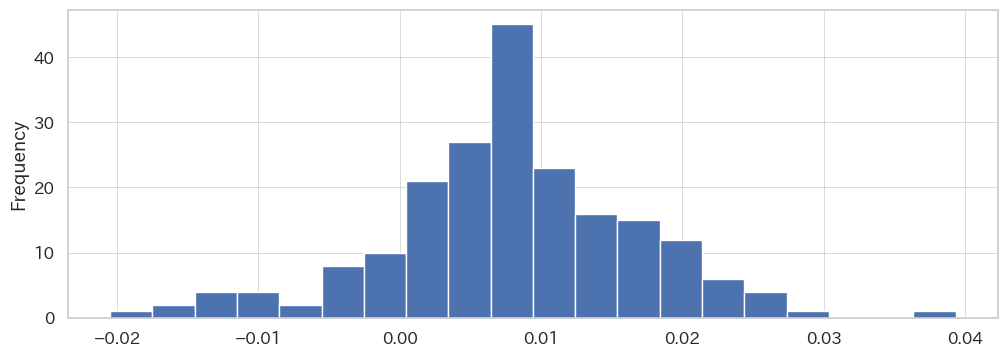

In [25]:
y.plot.hist(bins=20)

In [35]:
mff.adf_summary(y)

{'adf': -7.2009116579022265,
 'pvalue': 4.939013636098055e-09,
 'usedlag': 1,
 'nobs': 200,
 'critical values': {'1%': -4.004762969375,
  '5%': -3.4326735717499997,
  '10%': -3.1400789225000003},
 'icbest': -1259.3388083075554}

,Price
Date,
1914-12-01,55.0000
1915-01-01,56.5500
1915-02-01,56.0000
1915-03-01,58.3000
1915-04-01,66.4500
...,...
1968-08-01,883.7200
1968-09-01,922.8000
1968-10-01,955.4700


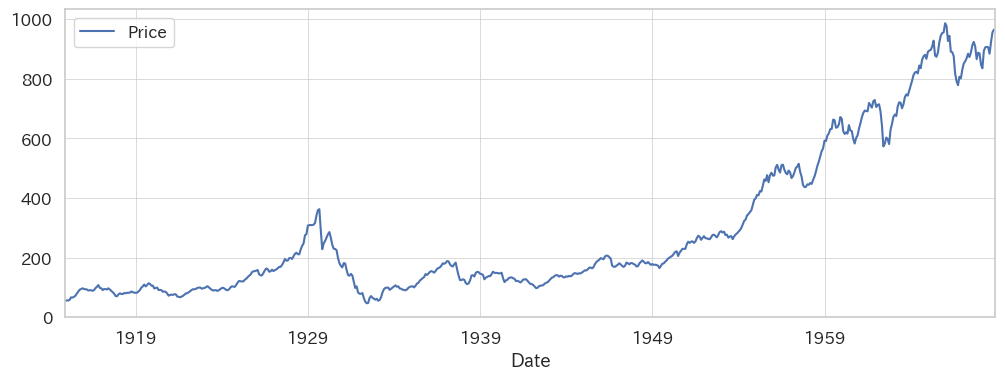

In [36]:
ts = sns.load_dataset('dowjones')

ts['Date'] = pd.to_datetime(ts['Date'])
ts.set_index('Date', inplace=True)
ts = ts.asfreq('MS')

ts.plot()
ts

(<Figure size 1200x400 with 1 Axes>, <Figure size 1200x400 with 1 Axes>)

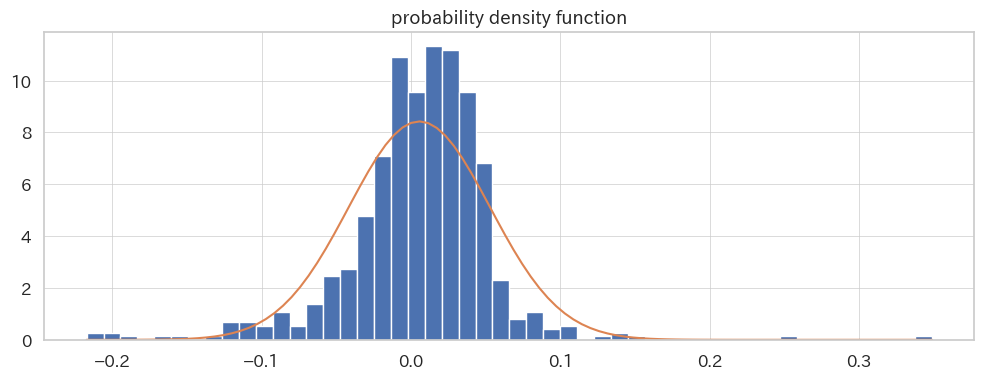

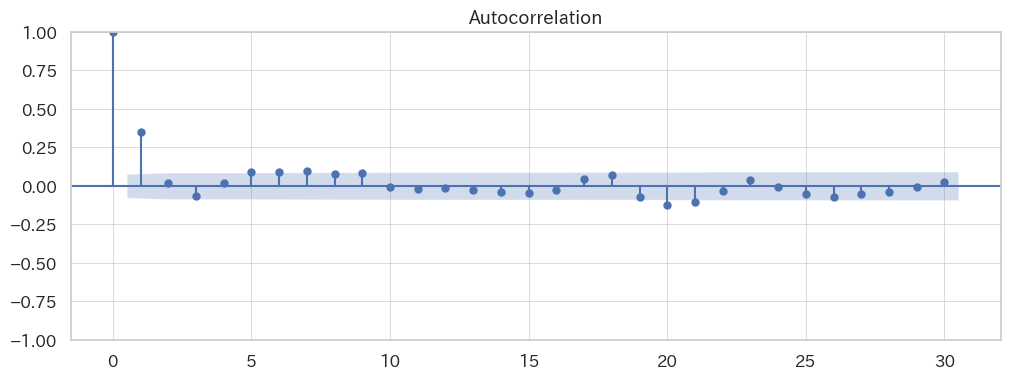

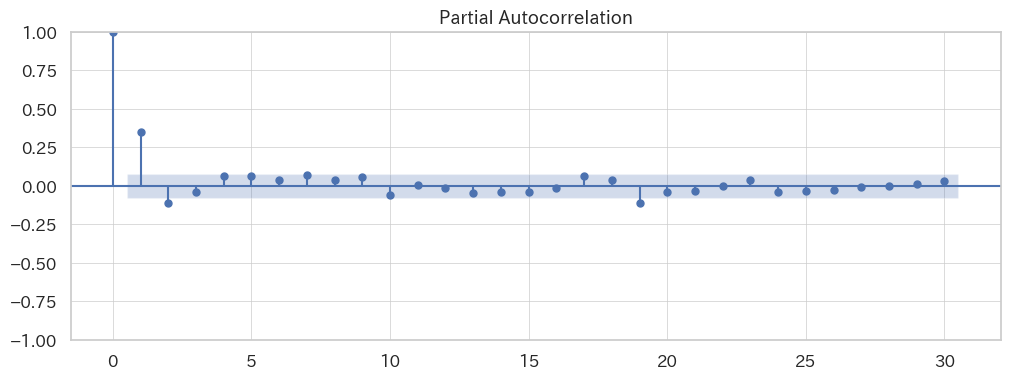

In [37]:
ts_r = ts.iloc[:,0].pct_change().dropna()
mff.histgram_pdf(ts_r)
mff.acf_plot(ts_r)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96140D+00    |proj g|=  3.75000D-02


 This problem is unconstrained.



At iterate    5    f=  3.89022D+00    |proj g|=  1.07816D-01

At iterate   10    f=  3.86475D+00    |proj g|=  8.02682D-03

At iterate   15    f=  3.86265D+00    |proj g|=  3.36617D-03

At iterate   20    f=  3.86026D+00    |proj g|=  3.72600D-02

At iterate   25    f=  3.85817D+00    |proj g|=  4.15464D-03

At iterate   30    f=  3.85805D+00    |proj g|=  6.58554D-04

At iterate   35    f=  3.85785D+00    |proj g|=  6.03869D-03

At iterate   40    f=  3.85776D+00    |proj g|=  2.12564D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     52      1     0     0   2.240D-06   3.858D+00
  F =   3.85776026446

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Price   No. Observations:                  649
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -2503.686
Date:                              Sat, 17 Aug 2024   AIC                           5021.373
Time:                                      20:25:57   BIC                           5052.559
Sample:                                  12-01-1914   HQIC                          5033.481
                                       - 12-01-1968                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6595      0.416      1.584      0.113      -0.156       1.476
ar.L2          0.1010      0.106      0.957      0.339      -0.106       0.308
ma.L1         -0.3948      0.412     -0.958      0.338      -1.202       0.412
ma.L2         -0.2694      0.104     -2.581      0.010      -0.474      -0.065
ar.S.L12      -0.0840      0.039     -2.144      0.032      -0.161      -0.007
ma.S.L12      -0.9191      0.019    -48.041      0.000      -0.957      -0.882
sigma2       148.0021      4.259     34.753      0.000     139.655     156.349
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1376.90
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.67   Skew:                            -0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

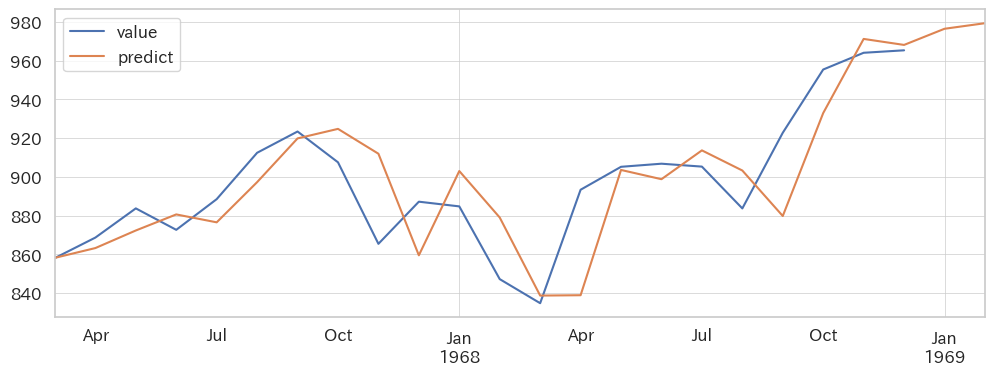

In [38]:
import statsmodels.api as sm

res = sm.tsa.SARIMAX(ts, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12)).fit()

mff.statmodels_predict(res, 3).tail(24).plot()
res.summary()

(<Figure size 1200x400 with 1 Axes>, <Figure size 1200x400 with 1 Axes>)

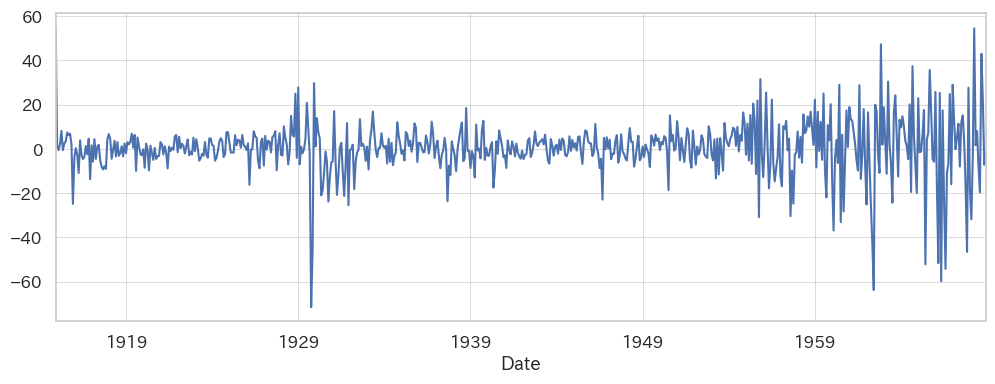

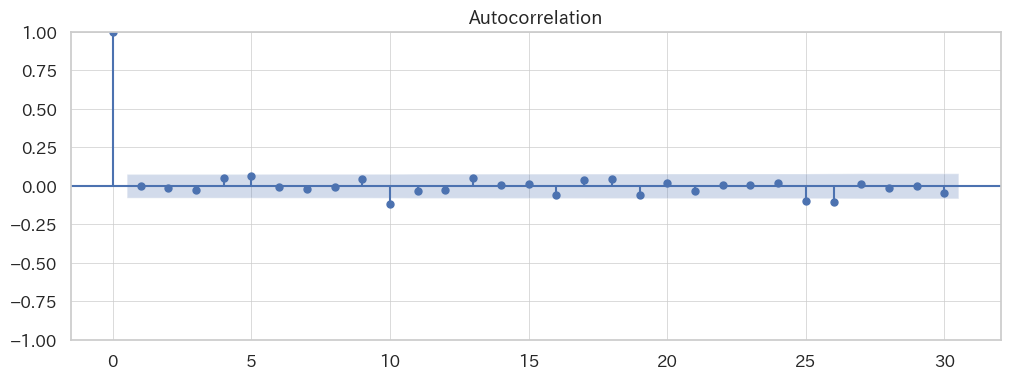

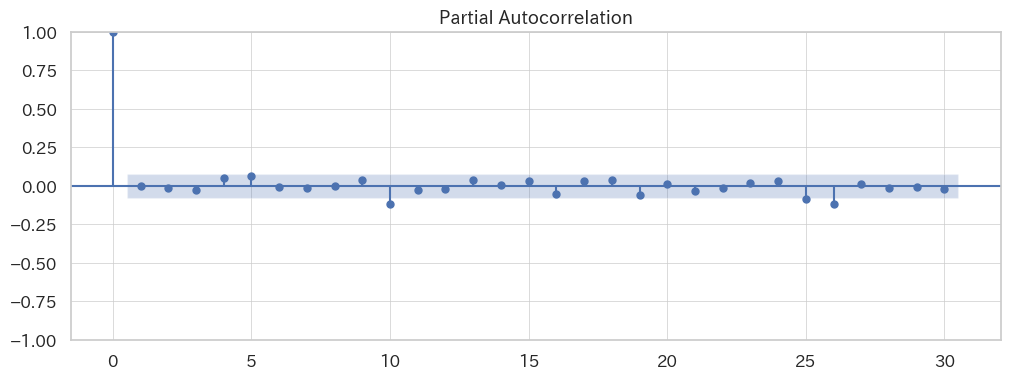

In [39]:
res.resid.plot()
mff.acf_plot(res.resid)

# time series features

<Axes: xlabel='freq/y'>

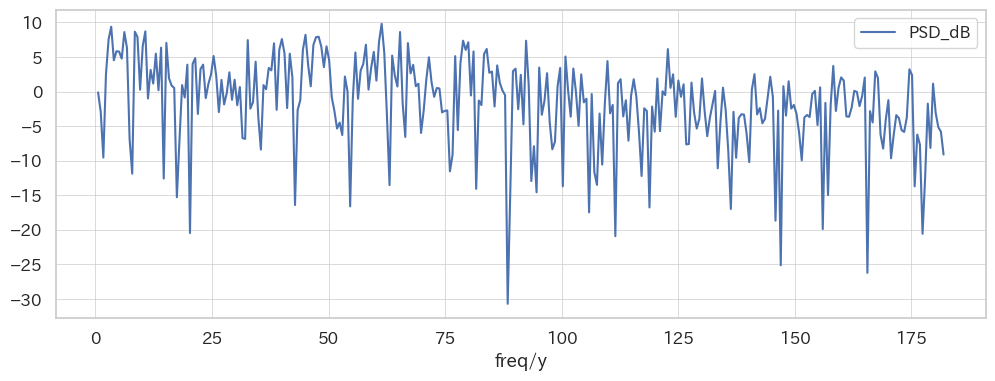

In [40]:
mff.fast_Fourier_transform_psd(ts_r.values).plot(legend=True)

<Axes: xlabel='Date'>

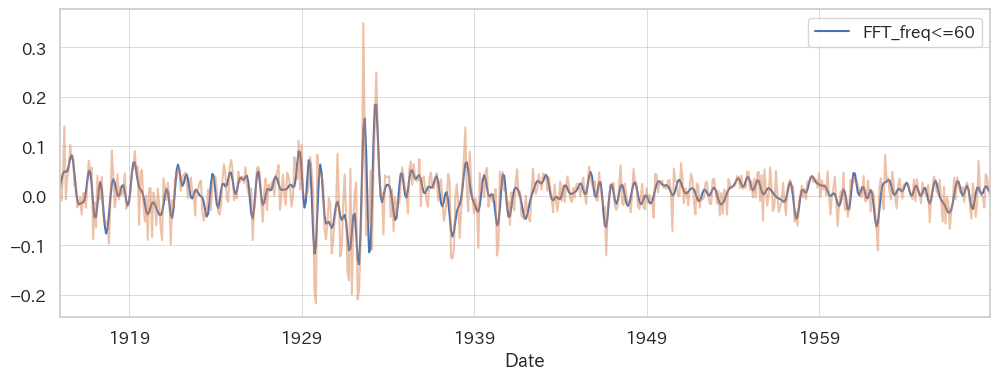

In [41]:
mff.fast_Fourier_transform(ts_r, freq_cut=60).plot(legend=True)
ts_r.plot(alpha=0.5)

<Axes: xlabel='Date'>

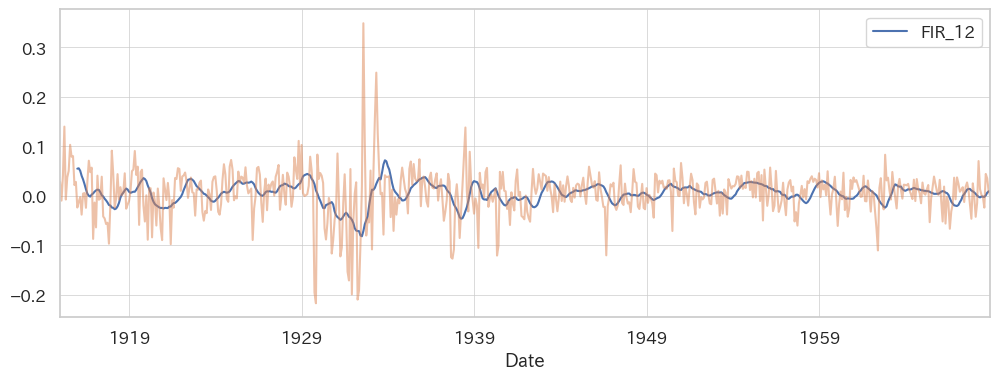

In [42]:
mff.filter_finite_impulse_response(ts_r, window=12).plot(legend=True)
ts_r.plot(alpha=0.5)

<Axes: xlabel='Date'>

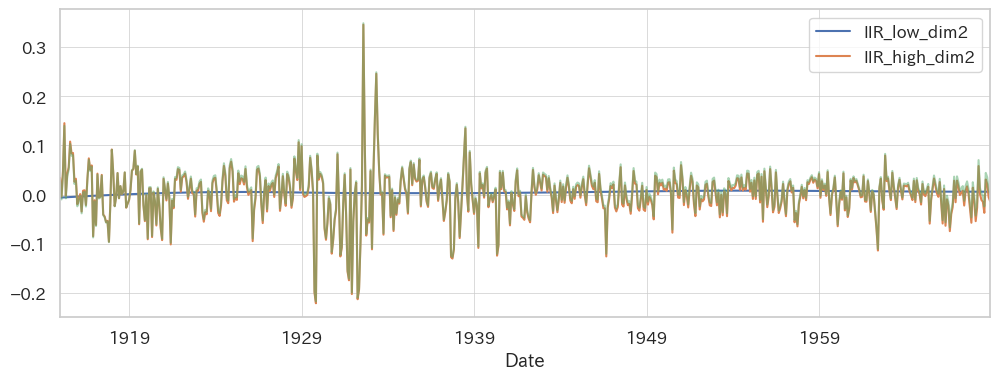

In [43]:
mff.filter_IIR_Butterworth(ts_r, dimension=2).plot(legend=True)
ts_r.plot(alpha=0.5)

,Price,return,hwm,mdd,mean,var,skew,kurt,hurst,fft,fir,iir_low,iir_high
Date,,,,,,,,,,,,,
1914-12-01,55.0000,NaN,55.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1915-01-01,56.5500,0.0282,56.5500,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1915-02-01,56.0000,-0.0097,56.5500,-0.0097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1915-03-01,58.3000,0.0411,58.3000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1915-04-01,66.4500,0.1398,66.4500,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968-08-01,883.7200,-0.0239,923.4500,-0.0430,-0.0022,0.0010,0.8428,1.5936,-0.5836,-0.0043,0.0142,0.0077,-0.0210
1968-09-01,922.8000,0.0442,922.8000,0.0000,0.0005,0.0012,0.6494,0.2467,-1.0346,-0.0045,0.0119,-0.0730,-0.1048
1968-10-01,955.4700,0.0354,955.4700,0.0000,0.0049,0.0012,0.2696,-0.3868,-0.6519,0.0024,0.0052,-0.0239,0.0462


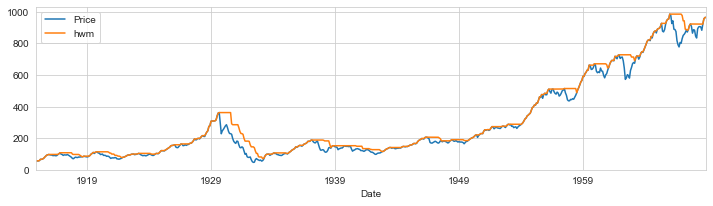

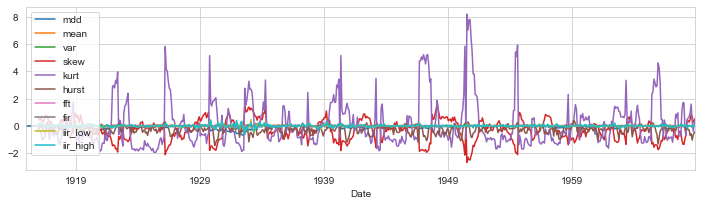

In [15]:
# rolling features
w = 12

ts_feat = ts.copy()
ts_feat['return'] = ts.pct_change()
ts_feat['hwm'] = mff.high_water_mark(ts, window=w)
ts_feat['mdd'] = mff.max_draw_down(ts, window=w)

l_ = list()
for i in range(w, len(ts_r)+1):
    x = ts_r[i-w:i]
    l_.append((
        x.mean(),
        x.var(),
        x.skew(),
        x.kurt(),
        mff.hurst(x),
        mff.fast_Fourier_transform(x, freq_cut=60)[-1],
        mff.filter_finite_impulse_response(x, window=6)[-1],
        mff.filter_IIR_Butterworth(x, dimension=1).iloc[0, -1],
        mff.filter_IIR_Butterworth(x, dimension=1).iloc[1, -1],
    ))

ts_feat = ts_feat.join(
    pd.DataFrame(l_, index=ts_r.index[w-1:],
                 columns=['mean', 'var', 'skew', 'kurt', 'hurst', 'fft', 'fir', 'iir_low', 'iir_high'])
)

ts_feat.iloc[:,[0,2]].plot()
ts_feat.iloc[:,3:].plot()
ts_feat

In [16]:
from sklearn.model_selection import train_test_split
ts_target = ts_feat.shift(-1).dropna().iloc[1:, 1]  # 1month delay
ts_features = ts_feat.dropna().iloc[:-1, 2:]  # 1month cut

ts_train_test = train_test_split(
    ts_features, ts_target, random_state=0, shuffle=False, test_size=0.2)
ts_features.tail(3)

,hwm,mdd,mean,var,skew,kurt,hurst,fft,fir,iir_low,iir_high
Date,,,,,,,,,,,
1968-09-01,922.8000,0.0000,0.0005,0.0012,0.6494,0.2467,-1.0346,-0.0045,0.0119,-0.0730,-0.1048
1968-10-01,955.4700,0.0000,0.0049,0.0012,0.2696,-0.3868,-0.6519,0.0024,0.0052,-0.0239,0.0462
1968-11-01,964.1200,0.0000,0.0095,0.0010,0.3396,0.1559,-0.4931,0.0119,0.0077,0.0107,-0.0166


features_model         DummyRegressor()
score                           -0.0100
n_features_original                  11
coef                               None
intercept                          None
dtype: object


<AxesSubplot: xlabel='Date'>

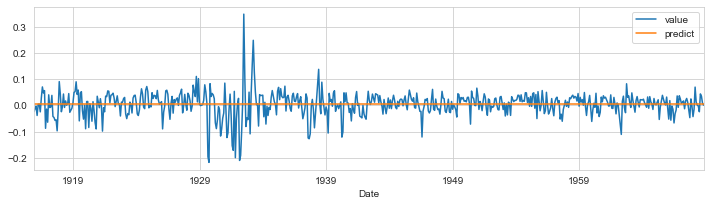

In [17]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean')
mff.sklearn_predict_regression(dummy, ts_train_test).plot()

features_model                                        LinearRegression()
score                                                            -0.2400
n_features_original                                                   11
coef                   [-0.0, 0.06, 0.8, 0.92, -0.0, -0.0, 0.0, -0.34...
intercept                                                         0.0100
dtype: object


<AxesSubplot: xlabel='Date'>

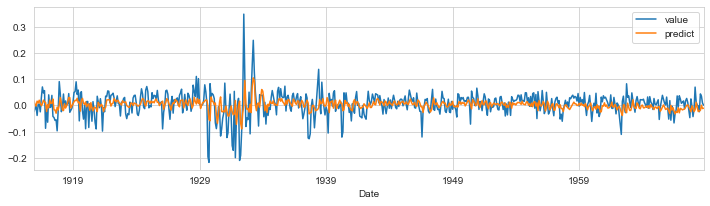

In [18]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
mff.sklearn_predict_regression(ols, ts_train_test).plot()

features_model                                          Ridge(alpha=0.5)
score                                                            -0.1300
n_features_original                                                   11
coef                   [-0.0, 0.07, 0.05, 0.01, 0.0, 0.0, 0.01, -0.07...
intercept                                                         0.0200
dtype: object


<AxesSubplot: xlabel='Date'>

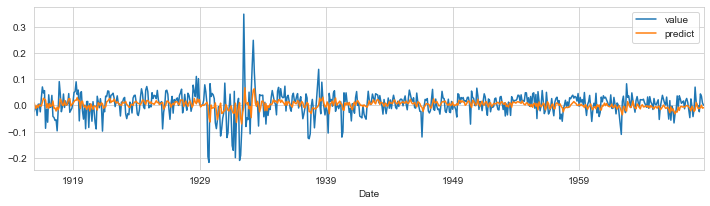

In [19]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
mff.sklearn_predict_regression(ridge, ts_train_test).plot()

features_model         RFECV(estimator=LinearRegression(), scoring='n...
score                                                            -0.0200
n_features_original                                                   11
coef                                                                None
intercept                                                           None
dtype: object


,hwm,mdd,mean,var,skew,kurt,hurst,fft,fir,iir_low,iir_high
flg,False,True,True,True,False,False,False,True,True,True,True
rank,5,1,1,1,3,4,2,1,1,1,1


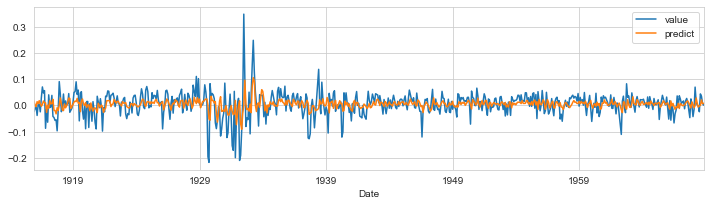

In [20]:
# 再帰的特徴量除去
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error")
res = mff.sklearn_predict_regression(rfecv, ts_train_test)
res.plot()

# 維持すべき特徴量
pd.DataFrame({
    'flg': rfecv.support_,
    'rank': rfecv.ranking_
}, index=ts_train_test[0].columns).T

# multi time series

In [64]:
df = sns.load_dataset('healthexp')
df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.3110,70.6000
1,1970,France,192.1430,72.2000
2,1970,Great Britain,123.9930,71.9000
3,1970,Japan,150.4370,72.0000
4,1970,USA,326.9610,70.9000
...,...,...,...,...
269,2020,Germany,"6,938.9830",81.1000
270,2020,France,"5,468.4180",82.3000
271,2020,Great Britain,"5,018.7000",80.4000
272,2020,Japan,"4,665.6410",84.7000


In [65]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df = df.pivot_table('Spending_USD', 'Year', 'Country')
df = df.asfreq('YS')
df

Country,Canada,France,Germany,Great Britain,Japan,USA
Year,,,,,,
1970-01-01,NaN,192.1430,252.3110,123.9930,150.4370,326.9610
1971-01-01,313.3910,NaN,298.2510,134.1720,163.8540,357.9880
1972-01-01,NaN,NaN,337.3640,NaN,185.3900,397.0970
1973-01-01,NaN,NaN,384.5410,NaN,205.7780,439.3020
1974-01-01,NaN,NaN,452.7440,NaN,242.0180,495.1140
1975-01-01,NaN,363.6100,532.4810,NaN,284.2690,560.7500
1976-01-01,543.3370,NaN,591.0980,NaN,303.7250,638.8510
1977-01-01,NaN,NaN,647.3520,NaN,340.6280,726.2410
1978-01-01,NaN,NaN,729.4570,NaN,392.5770,808.8840


<AxesSubplot: xlabel='Year'>

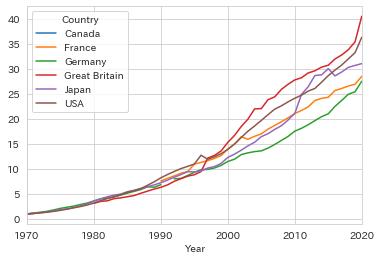

In [66]:
# df.columns=['EqD','BoD','ReD','Com']
# df.index.name='date'
# df=df.asfreq('B').fillna(method='ffill')
df_p=df.pct_change().dropna()
n_pred=10
w=20

ts=df_p.iloc[:,0]+1
x=df_p
y=x.iloc[:,0].shift(-w).dropna()
valid=x.iloc[-n_pred:,0]

target=y.dropna().tail(n_pred)
train=x[-n_pred-w:-n_pred]
train_pred=x.tail(w)

(df/df.iloc[0]).plot()